In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ml
import sklearn.preprocessing as pre


In [125]:
cancer_dataset = pd.read_csv("../datasets/cancer.csv")
cancer_labels = [1 if val == 'M' else -1 for val in cancer_dataset['label'].values]
cancer_points = cancer_dataset.drop(['label'], axis=1).values

cancer_points = pre.MinMaxScaler().fit_transform(cancer_points)

cancer_points_training, cancer_points_test, cancer_labels_training, cancer_labels_test = ml.train_test_split(cancer_points, cancer_labels, train_size=0.8)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [126]:
spam_dataset = pd.read_csv("../datasets/spam.csv")
spam_labels = [val for val in spam_dataset['label'].values]
spam_points = spam_dataset.drop(['label'], axis=1).values

spam_points = pre.MinMaxScaler().fit_transform(spam_points)
spam_labels = (spam_labels == spam_labels[0]) * 2 - 1

spam_points_training, spam_points_test, spam_labels_training, spam_labels_test = ml.train_test_split(spam_points, spam_labels, train_size=0.8)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [205]:
def to_row(arr, size):
    return arr.reshape(size, 1)

def gradient(dim, train_size, weights, x_train, y_train): 
    return to_row( y_train / (1 + np.exp(y_train * (x_train @ weights).flatten())) @ x_train, dim) / train_size

def logistic_regression(x_train, x_test, y_train, y_test, eta, mini_batch=500, max_iter=500):
    dim = x_train.shape[1]
    train_size = x_train.shape[0]
    
    weights = np.random.rand(dim, 1)
    # weights = np.zeros((dim, 1))
    result_errors = list()
    prev_err = None
    for _ in range(max_iter):
        # Go per mini batch
        for start_ind in range(0, train_size, mini_batch):
            x_train_batch, y_train_batch = x_train[start_ind:start_ind + mini_batch], y_train[start_ind:start_ind + mini_batch]
            weights += eta * gradient(dim, train_size, weights, x_train_batch, y_train_batch)
                
        cur_err = np.sum(np.abs(np.sign(x_test @ weights).flatten() - y_test)) / 2
        if prev_err and prev_err < cur_err:
            break
        result_errors.append(cur_err)
        prev_err = cur_err
    return result_errors
    
def graph(err):
    plt.plot(err)
    plt.show()


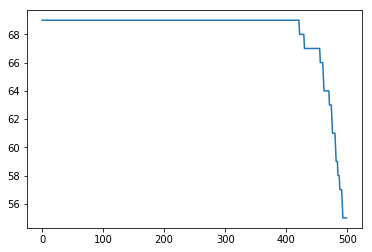

In [206]:
graph(logistic_regression(cancer_points_training, cancer_points_test, cancer_labels_training, cancer_labels_test, 0.01))


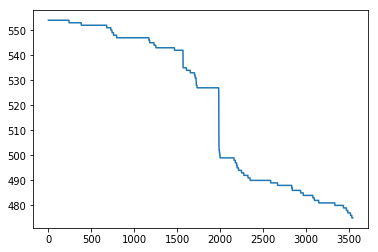

In [207]:
graph(logistic_regression(spam_points_training, spam_points_test, spam_labels_training, spam_labels_test, 0.01, 200, 5000))
